In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Jonas_1 = "Now the word of the LORD came to Jonah the son of Amittai, saying,Arise, go to Nineveh, that great city, and cry against it; for their wickedness is come up before me.But Jonah rose up to flee to Tarshish from the presence of the LORD, and went down to Joppa; and he found a ship going to Tarshish: so he paid the fare thereof, and went down into it, to go with them to Tarshish from the presence of the LORD.But the LORD sent out a great wind into the sea, and there was a mighty tempest in the sea, so that the ship was like to be broken.Then the mariners were afraid, and cried every man to his god, and cast forth the wares that were in the ship into the sea, to lighten it of them. But Jonah was gone down into the sides of the ship; and he lay, and was fast asleep.So the shipmaster came to him, and said to him, What mean you, O sleeper? arise, call on your God, if so be that God will think on us, that we perish not.And they said every one to his fellow, Come, and let us cast lots, that we may know for whose cause this evil is on us. So they cast lots, and the lot fell on Jonah.Then said they to him, Tell us, we pray you, for whose cause this evil is on us; What is your occupation? and from where come you? what is your country? and of what people are you?And he said to them, I am an Hebrew; and I fear the LORD, the God of heaven, which has made the sea and the dry land.Then were the men exceedingly afraid, and said to him. Why have you done this? For the men knew that he fled from the presence of the LORD, because he had told them.Then said they to him, What shall we do to you, that the sea may be calm to us? for the sea worked, and was tempestuous.And he said to them, Take me up, and cast me forth into the sea; so shall the sea be calm to you: for I know that for my sake this great tempest is on you.Nevertheless the men rowed hard to bring it to the land; but they could not: for the sea worked, and was tempestuous against them.Why they cried to the LORD, and said, We beseech you, O LORD, we beseech you, let us not perish for this man' life, and lay not on us innocent blood: for you, O LORD, have done as it pleased you.So they look up Jonah, and cast him forth into the sea: and the sea ceased from her raging.Then the men feared the LORD exceedingly, and offered a sacrifice to the LORD, and made vows.Now the LORD had prepared a great fish to swallow up Jonah. And Jonah was in the belly of the fish three days and three nights.".lower()

In [6]:
Jonas_2 = "Then Jonah prayed to the LORD his God out of the fish' belly,And said, I cried by reason of my affliction to the LORD, and he heard me; out of the belly of hell cried I, and you heard my voice.For you had cast me into the deep, in the middle of the seas; and the floods compassed me about: all your billows and your waves passed over me.Then I said, I am cast out of your sight; yet I will look again toward your holy temple.The waters compassed me about, even to the soul: the depth closed me round about, the weeds were wrapped about my head.I went down to the bottoms of the mountains; the earth with her bars was about me for ever: yet have you brought up my life from corruption, O LORD my God.When my soul fainted within me I remembered the LORD: and my prayer came in to you, into your holy temple.They that observe lying vanities forsake their own mercy.But I will sacrifice to you with the voice of thanksgiving; I will pay that that I have vowed. Salvation is of the LORD.And the LORD spoke to the fish, and it vomited out Jonah on the dry land.".lower()

In [7]:
Jonas_3 = "And the word of the LORD came to Jonah the second time, saying,Arise, go to Nineveh, that great city, and preach to it the preaching that I bid you.So Jonah arose, and went to Nineveh, according to the word of the LORD. Now Nineveh was an exceeding great city of three days'journey.And Jonah began to enter into the city a day' journey, and he cried, and said, Yet forty days, and Nineveh shall be overthrown.So the people of Nineveh believed God, and proclaimed a fast, and put on sackcloth, from the greatest of them even to the least of them.For word came to the king of Nineveh, and he arose from his throne, and he laid his robe from him, and covered him with sackcloth, and sat in ashes.And he caused it to be proclaimed and published through Nineveh by the decree of the king and his nobles, saying, Let neither man nor beast, herd nor flock, taste any thing: let them not feed, nor drink water:But let man and beast be covered with sackcloth, and cry mightily to God: yes, let them turn every one from his evil way, and from the violence that is in their hands.Who can tell if God will turn and repent, and turn away from his fierce anger, that we perish not?And God saw their works, that they turned from their evil way; and God repented of the evil, that he had said that he would do to them; and he did it not.".lower()

In [8]:
Jonas_4 = "But it displeased Jonah exceedingly, and he was very angry.And he prayed to the LORD, and said, I pray you, O LORD, was not this my saying, when I was yet in my country? Therefore I fled before to Tarshish: for I knew that you are a gracious God, and merciful, slow to anger, and of great kindness, and repent you of the evil.Therefore now, O LORD, take, I beseech you, my life from me; for it is better for me to die than to live.Then said the LORD, Do you well to be angry?So Jonah went out of the city, and sat on the east side of the city, and there made him a booth, and sat under it in the shadow, till he might see what would become of the city.And the LORD God prepared a gourd, and made it to come up over Jonah, that it might be a shadow over his head, to deliver him from his grief. So Jonah was exceeding glad of the gourd.But God prepared a worm when the morning rose the next day, and it smote the gourd that it withered.And it came to pass, when the sun did arise, that God prepared a vehement east wind; and the sun beat on the head of Jonah, that he fainted, and wished in himself to die, and said, It is better for me to die than to live.And God said to Jonah, Do you well to be angry for the gourd? And he said, I do well to be angry, even to death.Then said the LORD, You have had pity on the gourd, for the which you have not labored, neither made it grow; which came up in a night, and perished in a night:And should not I spare Nineveh, that great city, wherein are more then six score thousand persons that cannot discern between their right hand and their left hand; and also much cattle?".lower()

In [24]:
tokens = nltk.word_tokenize(Jonas_4)

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [27]:
print(filtered_sentence1)

['displeased', 'jonah', 'exceedingly', ',', 'angry.and', 'prayed', 'lord', ',', 'said', ',', 'pray', ',', 'lord', ',', 'saying', ',', 'yet', 'country', '?', 'therefore', 'fled', 'tarshish', ':', 'knew', 'gracious', 'god', ',', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repent', 'evil.therefore', ',', 'lord', ',', 'take', ',', 'beseech', ',', 'life', ';', 'better', 'die', 'live.then', 'said', 'lord', ',', 'well', 'angry', '?', 'jonah', 'went', 'city', ',', 'sat', 'east', 'side', 'city', ',', 'made', 'booth', ',', 'sat', 'shadow', ',', 'till', 'might', 'see', 'would', 'become', 'city.and', 'lord', 'god', 'prepared', 'gourd', ',', 'made', 'come', 'jonah', ',', 'might', 'shadow', 'head', ',', 'deliver', 'grief', '.', 'jonah', 'exceeding', 'glad', 'gourd.but', 'god', 'prepared', 'worm', 'morning', 'rose', 'next', 'day', ',', 'smote', 'gourd', 'withered.and', 'came', 'pass', ',', 'sun', 'arise', ',', 'god', 'prepared', 'vehement', 'east', 'wind', ';', 'sun', 'beat', 'h

In [28]:
data =np.array([["Jonas_1", "'word', 'lord', 'came', 'jonah', 'son', 'amittai', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'cry', ';', 'wickedness', 'come', 'me.but', 'jonah', 'rose', 'flee', 'tarshish', 'presence', 'lord', ',', 'went', 'joppa', ';', 'found', 'ship', 'going', 'tarshish', ':', 'paid', 'fare', 'thereof', ',', 'went', ',', 'go', 'tarshish', 'presence', 'lord.but', 'lord', 'sent', 'great', 'wind', 'sea', ',', 'mighty', 'tempest', 'sea', ',', 'ship', 'like', 'broken.then', 'mariners', 'afraid', ',', 'cried', 'every', 'man', 'god', ',', 'cast', 'forth', 'wares', 'ship', 'sea', ',', 'lighten', '.', 'jonah', 'gone', 'sides', 'ship', ';', 'lay', ',', 'fast', 'asleep.so', 'shipmaster', 'came', ',', 'said', ',', 'mean', ',', 'sleeper', '?', 'arise', ',', 'call', 'god', ',', 'god', 'think', 'us', ',', 'perish', 'not.and', 'said', 'every', 'one', 'fellow', ',', 'come', ',', 'let', 'us', 'cast', 'lots', ',', 'may', 'know', 'whose', 'cause', 'evil', 'us', '.', 'cast', 'lots', ',', 'lot', 'fell', 'jonah.then', 'said', ',', 'tell', 'us', ',', 'pray', ',', 'whose', 'cause', 'evil', 'us', ';', 'occupation', '?', 'come', '?', 'country', '?', 'people', '?', 'said', ',', 'hebrew', ';', 'fear', 'lord', ',', 'god', 'heaven', ',', 'made', 'sea', 'dry', 'land.then', 'men', 'exceedingly', 'afraid', ',', 'said', '.', 'done', '?', 'men', 'knew', 'fled', 'presence', 'lord', ',', 'told', 'them.then', 'said', ',', 'shall', ',', 'sea', 'may', 'calm', 'us', '?', 'sea', 'worked', ',', 'tempestuous.and', 'said', ',', 'take', ',', 'cast', 'forth', 'sea', ';', 'shall', 'sea', 'calm', ':', 'know', 'sake', 'great', 'tempest', 'you.nevertheless', 'men', 'rowed', 'hard', 'bring', 'land', ';', 'could', ':', 'sea', 'worked', ',', 'tempestuous', 'them.why', 'cried', 'lord', ',', 'said', ',', 'beseech', ',', 'lord', ',', 'beseech', ',', 'let', 'us', 'perish', 'man', ', 'life', ',', 'lay', 'us', 'innocent', 'blood', ':', ',', 'lord', ',', 'done', 'pleased', 'you.so', 'look', 'jonah', ',', 'cast', 'forth', 'sea', ':', 'sea', 'ceased', 'raging.then', 'men', 'feared', 'lord', 'exceedingly', ',', 'offered', 'sacrifice', 'lord', ',', 'made', 'vows.now', 'lord', 'prepared', 'great', 'fish', 'swallow', 'jonah', '.', 'jonah', 'belly', 'fish', 'three', 'days', 'three', 'nights', '.'"],
               ["Jonas_2", "'jonah', 'prayed', 'lord', 'god', 'fish', ', 'belly', ',', 'said', ',', 'cried', 'reason', 'affliction', 'lord', ',', 'heard', ';', 'belly', 'hell', 'cried', ',', 'heard', 'voice.for', 'cast', 'deep', ',', 'middle', 'seas', ';', 'floods', 'compassed', ':', 'billows', 'waves', 'passed', 'me.then', 'said', ',', 'cast', 'sight', ';', 'yet', 'look', 'toward', 'holy', 'temple.the', 'waters', 'compassed', ',', 'even', 'soul', ':', 'depth', 'closed', 'round', ',', 'weeds', 'wrapped', 'head.i', 'went', 'bottoms', 'mountains', ';', 'earth', 'bars', 'ever', ':', 'yet', 'brought', 'life', 'corruption', ',', 'lord', 'god.when', 'soul', 'fainted', 'within', 'remembered', 'lord', ':', 'prayer', 'came', ',', 'holy', 'temple.they', 'observe', 'lying', 'vanities', 'forsake', 'mercy.but', 'sacrifice', 'voice', 'thanksgiving', ';', 'pay', 'vowed', '.', 'salvation', 'lord.and', 'lord', 'spoke', 'fish', ',', 'vomited', 'jonah', 'dry', 'land', '.'"],
               ["Jonas_3", "'word', 'lord', 'came', 'jonah', 'second', 'time', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'preach', 'preaching', 'bid', 'you.so', 'jonah', 'arose', ',', 'went', 'nineveh', ',', 'according', 'word', 'lord', '.', 'nineveh', 'exceeding', 'great', 'city', 'three', days'journey.and, 'jonah', 'began', 'enter', 'city', 'day', ', 'journey', ',', 'cried', ',', 'said', ',', 'yet', 'forty', 'days', ',', 'nineveh', 'shall', 'overthrown.so', 'people', 'nineveh', 'believed', 'god', ',', 'proclaimed', 'fast', ',', 'put', 'sackcloth', ',', 'greatest', 'even', 'least', 'them.for', 'word', 'came', 'king', 'nineveh', ',', 'arose', 'throne', ',', 'laid', 'robe', ',', 'covered', 'sackcloth', ',', 'sat', 'ashes.and', 'caused', 'proclaimed', 'published', 'nineveh', 'decree', 'king', 'nobles', ',', 'saying', ',', 'let', 'neither', 'man', 'beast', ',', 'herd', 'flock', ',', 'taste', 'thing', ':', 'let', 'feed', ',', 'drink', 'water', ':', 'let', 'man', 'beast', 'covered', 'sackcloth', ',', 'cry', 'mightily', 'god', ':', 'yes', ',', 'let', 'turn', 'every', 'one', 'evil', 'way', ',', 'violence', 'hands.who', 'tell', 'god', 'turn', 'repent', ',', 'turn', 'away', 'fierce', 'anger', ',', 'perish', '?', 'god', 'saw', 'works', ',', 'turned', 'evil', 'way', ';', 'god', 'repented', 'evil', ',', 'said', 'would', ';', '.'"],
               ["Jonas_4", "'displeased', 'jonah', 'exceedingly', ',', 'angry.and', 'prayed', 'lord', ',', 'said', ',', 'pray', ',', 'lord', ',', 'saying', ',', 'yet', 'country', '?', 'therefore', 'fled', 'tarshish', ':', 'knew', 'gracious', 'god', ',', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repent', 'evil.therefore', ',', 'lord', ',', 'take', ',', 'beseech', ',', 'life', ';', 'better', 'die', 'live.then', 'said', 'lord', ',', 'well', 'angry', '?', 'jonah', 'went', 'city', ',', 'sat', 'east', 'side', 'city', ',', 'made', 'booth', ',', 'sat', 'shadow', ',', 'till', 'might', 'see', 'would', 'become', 'city.and', 'lord', 'god', 'prepared', 'gourd', ',', 'made', 'come', 'jonah', ',', 'might', 'shadow', 'head', ',', 'deliver', 'grief', '.', 'jonah', 'exceeding', 'glad', 'gourd.but', 'god', 'prepared', 'worm', 'morning', 'rose', 'next', 'day', ',', 'smote', 'gourd', 'withered.and', 'came', 'pass', ',', 'sun', 'arise', ',', 'god', 'prepared', 'vehement', 'east', 'wind', ';', 'sun', 'beat', 'head', 'jonah', ',', 'fainted', ',', 'wished', 'die', ',', 'said', ',', 'better', 'die', 'live.and', 'god', 'said', 'jonah', ',', 'well', 'angry', 'gourd', '?', 'said', ',', 'well', 'angry', ',', 'even', 'death.then', 'said', 'lord', ',', 'pity', 'gourd', ',', 'labored', ',', 'neither', 'made', 'grow', ';', 'came', 'night', ',', 'perished', 'night', ':', 'spare', 'nineveh', ',', 'great', 'city', ',', 'wherein', 'six', 'score', 'thousand', 'persons', 'discern', 'right', 'hand', 'left', 'hand', ';', 'also', 'much', 'cattle', '?'"]])

In [30]:
df = pd.DataFrame(data, index=range(100,104),columns=['Autor', 'Livro'])

In [31]:
print(df)

       Autor                                              Livro
100  Jonas_1  'word', 'lord', 'came', 'jonah', 'son', 'amitt...
101  Jonas_2  'jonah', 'prayed', 'lord', 'god', 'fish', ', '...
102  Jonas_3  'word', 'lord', 'came', 'jonah', 'second', 'ti...
103  Jonas_4  'displeased', 'jonah', 'exceedingly', ',', 'an...


In [32]:
corpus = df['Livro'].tolist()

In [33]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

4 rows


,0,1,2,3
cast forth sea,0.130323,0.0,0.0,0.0
cause evil us,0.130323,0.0,0.0,0.0
sea worked tempestuous,0.130323,0.0,0.0,0.0
tarshish presence lord,0.130323,0.0,0.0,0.0
us cast lots,0.130323,0.0,0.0,0.0
whose cause evil,0.130323,0.0,0.0,0.0
afraid cried every,0.065161,0.0,0.0,0.0
afraid said done,0.065161,0.0,0.0,0.0
amittai saying arise,0.065161,0.0,0.0,0.0
and said every,0.065161,0.0,0.0,0.0


In [34]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [35]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [36]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


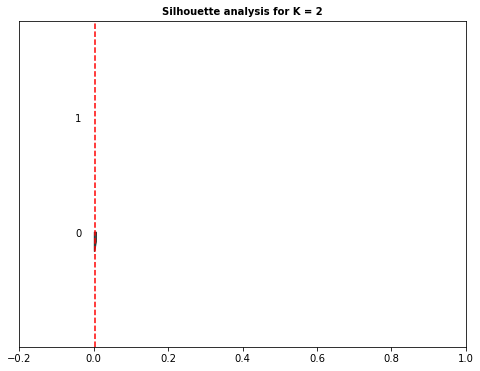

In [37]:
silhouette(kmeans_results, final_df, plot=True)

In [38]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

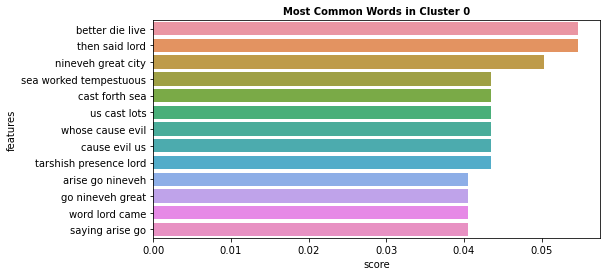

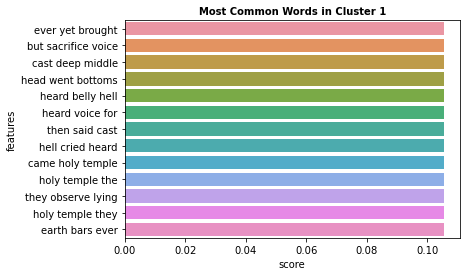

In [39]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [40]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

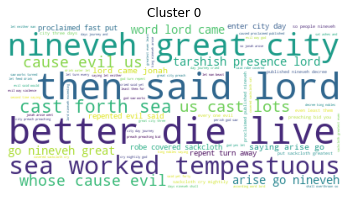

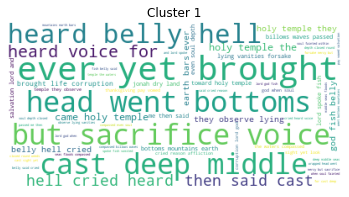

In [41]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [42]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jonas_1,"'word', 'lord', 'came', 'jonah', 'son', 'amitt...",0
101,Jonas_2,"'jonah', 'prayed', 'lord', 'god', 'fish', ', '...",1
102,Jonas_3,"'word', 'lord', 'came', 'jonah', 'second', 'ti...",0
103,Jonas_4,"'displeased', 'jonah', 'exceedingly', ',', 'an...",0


In [43]:
print(df)

       Autor                                              Livro  label
100  Jonas_1  'word', 'lord', 'came', 'jonah', 'son', 'amitt...      0
101  Jonas_2  'jonah', 'prayed', 'lord', 'god', 'fish', ', '...      1
102  Jonas_3  'word', 'lord', 'came', 'jonah', 'second', 'ti...      0
103  Jonas_4  'displeased', 'jonah', 'exceedingly', ',', 'an...      0
